In [11]:
import pandas as pd
import numpy as np
from PIL import Image, ImageOps, ImageFilter
from matplotlib import pyplot as plt
from sklearn.naive_bayes import GaussianNB
from os import listdir
from os.path import isfile, join
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import preprocessing

Baca dan tampilkan citra.

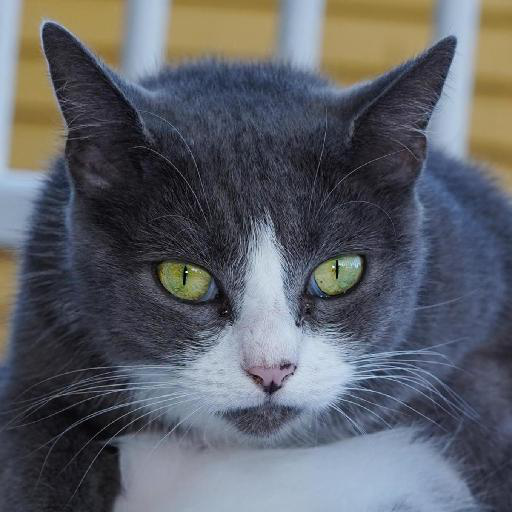

In [12]:
im  = Image.open(r'data\animal_classification\cat\flickr_cat_000005.jpg')
# im  = Image.open(r'data\animal_classification\dog\flickr_dog_000080.jpg')
# im  = Image.open(r'data\animal_classification\wild\flickr_wild_000095.jpg')
display(im)

In [13]:
print('Ukuran citra: %dx%d'%(im.size[0],im.size[1]))
print('Format citra: %s'%(im.format))

Ukuran citra: 512x512
Format citra: JPEG


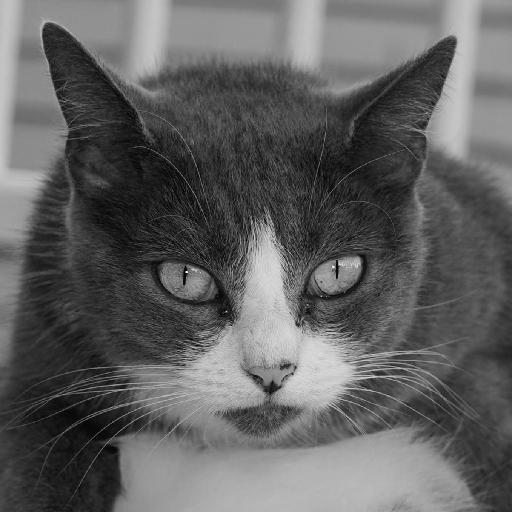

In [14]:
im = ImageOps.grayscale(im)
display(im)

Histogram

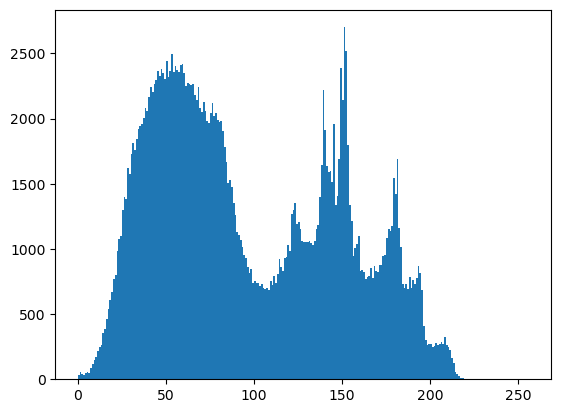

In [15]:
histogram = im.histogram()
imArray = np.asarray(im)
plt.hist(imArray.flatten(), bins=256, range=(0, 256))
plt.show()

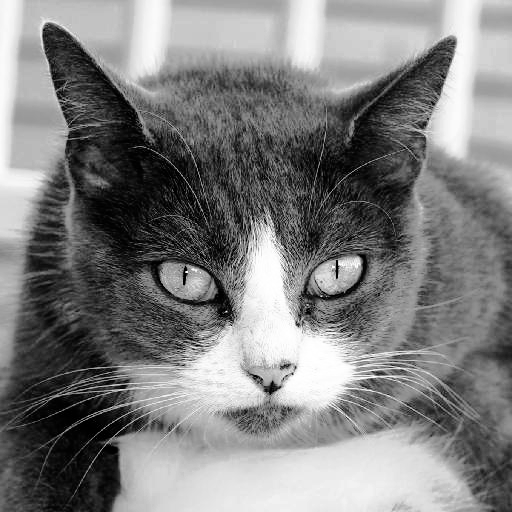

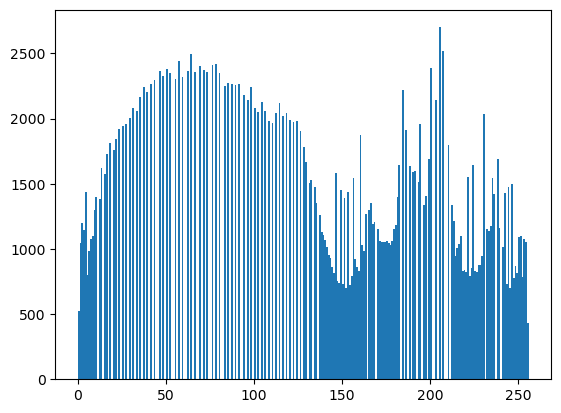

In [16]:
im = ImageOps.equalize(im, mask = None)
display(im)
imArray = np.array(im)
plt.hist(imArray.flatten(), bins=256, range=(0, 256))
plt.show()

Potong Citra (crop) citra di tengah.

In [17]:
def cropImage(image,size):
    width, height = image.size
    # crop_width = crop_height = min(width, height)
    crop_width = crop_height = size
    left = (width - crop_width) // 2 - 100
    top = (height - crop_height) // 2 + 100
    right = (width + crop_width) // 2
    bottom = (height + crop_height) // 2 + 100
    return image.crop((left, top, right, bottom))

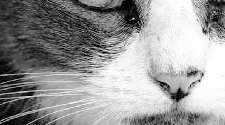

In [18]:
croppedImage = cropImage(im,125)
display(croppedImage)

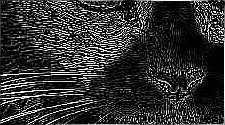

In [19]:
croppedImage = croppedImage.filter(ImageFilter.FIND_EDGES)
display(croppedImage)

In [20]:
imageArray = np.array(croppedImage)
print(imageArray)

[[ 35  37  39 ...  48  96 135]
 [ 46  26 102 ...   0   0  71]
 [ 46  34  99 ...  46   0  23]
 ...
 [137 255 255 ...  13  88 159]
 [146   0   0 ...   0 169 151]
 [  1   5   7 ... 149 172 146]]


In [21]:
print(imageArray.shape)
print(imageArray.ndim)

(125, 225)
2


Persiapkan untuk pelatihan model Pemelajaran Mesin.

In [22]:
def getFiles(mypath):
    onlyfiles = [mypath+f for f in listdir(mypath) if isfile(join(mypath, f))]
    return onlyfiles

def preprocessImage(imagePaths,imageClass):
    internalCounter = 0
    imageArrayList = list()
    classLabel = list()
    for imagePath in imagePaths:
        im  = Image.open(imagePath)
        im = ImageOps.grayscale(im)
        croppedImage = cropImage(im,175)
        # croppedImage = cropImage(im,125)
        croppedImage = croppedImage.filter(ImageFilter.FIND_EDGES)
        histogram = im.histogram()
        imArray = np.asarray(im)
        imageArray = np.array(croppedImage).flatten()
        imageArrayList.append(imageArray)
        classLabel.append(imageClass)
    return imageArrayList,classLabel

def getData():
    X,y = preprocessImage(getFiles('data/animal_classification/cat/'),'cat')
    a,b = preprocessImage(getFiles('data/animal_classification/dog/'),'dog')
    X = np.append(X,a,axis=0)
    y = np.append(y,b,axis=0)
    a,b = preprocessImage(getFiles('data/animal_classification/wild/'),'wild')
    X = np.append(X,a,axis=0)
    y = np.append(y,b,axis=0)
    return X,y
        

In [23]:
X,y = getData()
le = preprocessing.LabelEncoder()
y = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)

Klasifikasi dan Evaluasi

In [24]:
clf = MultinomialNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred, labels=[0,1,2]))

              precision    recall  f1-score   support

           0       0.57      0.52      0.54      1700
           1       0.46      0.63      0.53      1564
           2       0.53      0.39      0.45      1564

    accuracy                           0.51      4828
   macro avg       0.52      0.51      0.51      4828
weighted avg       0.52      0.51      0.51      4828



In [25]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred, labels=[0,1,2]))

              precision    recall  f1-score   support

           0       0.66      0.71      0.69      1700
           1       0.65      0.57      0.61      1564
           2       0.61      0.63      0.62      1564

    accuracy                           0.64      4828
   macro avg       0.64      0.64      0.64      4828
weighted avg       0.64      0.64      0.64      4828



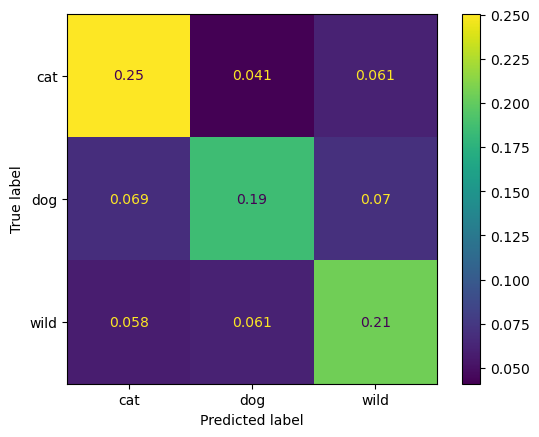

In [26]:
cm = confusion_matrix(y_test, y_pred, normalize='all')
cmd = ConfusionMatrixDisplay(cm, display_labels=['cat','dog','wild'])
cmd.plot()